# 1. Prepare Dataset

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/main_data.csv')
df.head(5)

,customer_id,gender,age,married,state,number_of_referrals,tenure_in_months,value_deal,phone_service,multiple_lines,...,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason,churn,tenure_category,age_group
0,49302-GUJ,Female,47,No,Gujarat,14,4,No deal,No,No,...,0.00,0,0.00,1993.20,Stayed,Other,Others,0,New customer,40 - 59
1,82811-HAR,Female,46,Yes,Haryana,2,18,Deal 2,Yes,No,...,0.00,0,2429.42,3330.32,Stayed,Other,Others,0,Mid-term customer,40 - 59
2,62683-UTT,Female,30,No,Uttar Pradesh,12,20,No deal,Yes,No,...,30.53,0,1549.04,2861.91,Stayed,Other,Others,0,Mid-term customer,20 - 39
3,18223-MAD,Male,32,No,Madhya Pradesh,14,2,No deal,No,No,...,0.00,0,0.00,825.40,Stayed,Other,Others,0,New customer,20 - 39
4,41111-MAH,Female,32,No,Maharashtra,10,8,No deal,Yes,Yes,...,0.00,0,1317.52,2387.67,Stayed,Other,Others,0,New customer,20 - 39


In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  6311 non-null   object 
 1   gender                       6311 non-null   object 
 2   age                          6311 non-null   int64  
 3   married                      6311 non-null   object 
 4   state                        6311 non-null   object 
 5   number_of_referrals          6311 non-null   int64  
 6   tenure_in_months             6311 non-null   int64  
 7   value_deal                   6311 non-null   object 
 8   phone_service                6311 non-null   object 
 9   multiple_lines               6311 non-null   object 
 10  internet_service             6311 non-null   object 
 11  internet_type                4945 non-null   object 
 12  online_security              6311 non-null   object 
 13  online_backup     

### Kiểm tra những giá trị không hợp lí

In [4]:
# Số lượng nan
df.isna().sum()

,0
customer_id,0
gender,0
age,0
married,0
state,0
number_of_referrals,0
tenure_in_months,0
value_deal,0
phone_service,0
multiple_lines,0


In [5]:
df['internet_type'].unique()


array(['DSL', nan, 'Cable', 'Fiber Optic'], dtype=object)

In [6]:
# Các giá trị Nan trong cột internet_type thực chất là None( không sử dụng dịch vụ mạng ), ta thay lại Nan thành None
df['internet_type'].fillna('None', inplace=True)

/tmp/ipython-input-28673118.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['internet_type'].fillna('None', inplace=True)


In [7]:
df['internet_type'].unique()

array(['DSL', 'None', 'Cable', 'Fiber Optic'], dtype=object)

### Drop những features không cần thiết cho việc dự đoán

In [8]:
# drop cột 'customer id'
columns_to_drop = ['customer_id' , 'customer_status' ,'churn_category' ,'churn_reason']
df = df.drop(columns=columns_to_drop, axis=1)

# 2. Feature Engineering

### Trước hết , dựa vào phần Dashboard , ta rút được vài insights như sau :
- Churn rate không khác biệt giữa 2 giới tính và tình trạng hôn nhân
- Bang có Churn rate cao nhất là 'Jammu & Kashmir' (0.57) trong khi 'Uttar Pradesh' là bang có nhiều Referrals nhất (4682)
- Đối với nhóm các nguyên nhân rời bỏ dịch vụ , đa số khách hàng không để lại nguyên nhân cụ thể (4778) . Trái lại , nguyên nhân phổ biến nhất được đưa ra là 'Competitor' (752)
- Trong các nhóm dịch vụ sau , Churn rate của nhóm khách có đăng ký sử dụng cao hơn nhóm không đăng ký:
  - Internet service
  - Multiple Lines (nhiều SĐT cùng lúc)
  - Paperless Billing (hóa đơn điện tử)
  - Phone Service
  - Streaming Movies
  - Streaming Music
  - Streaming TV
  - Unlimited Data
- Ngược lại , đối với nhóm dịch vụ sau đây , thì Churn rate của nhóm khách hàng không đăng ký lại cao hơn nhóm có đăng ký:
  - Device Protection Plan
  - Online Backup
  - Online Security
  - Premium Support
- Với Age groups , nhóm chiếm đa số là từ 20 -> 59 tuổi . Tuy nhiên Churn rate cao nhất đạt 0.36 , nằm ở nhóm cao tuổi (>= 60)
- Đối với nhóm các gói ưu đãi , điểm đáng chú ý là Churn rate lại tăng dần theo số lượng Deal , nói cách khác : Deal càng cao thì Churn rate càng lớn . Cao nhất là Deal 5 với Churn rate đạt 0.54
- Theo phân loại Tenure , ta có nhóm 'New customers' (<= 12 tháng) chiếm nhiều nhất . Tỉ lệ Churn của cả 3 nhóm Tenure là khá ngang nhau , bất ngờ nhất là nhóm 'Long-term customers' (> 24 tháng) lại có Churn rate cao nhất với 0.28  
- Về phân loại mạng Internet , loại mạng được dùng nhiều nhất là Fiber optic (2725) , cũng đồng thời có tỉ lệ Churn cao nhất (0.41)
- Về phần hợp đồng Contract , ta dễ thấy hợp đồng theo tháng (month-to-month) chiếm đa số , đồng thời cũng là nhóm có Churn rate cao nhất (0.46) . Churn rate giảm dần khi thời hạn hợp đồng càng tăng lên - đây là điều rất hợp lý
- Cuối cùng là phương thức thanh toán . Loại hình phổ biến nhất là 'Bank Withdrawal' (3521) , nhưng loại hình có Churn rate cao nhất là 'Mailed check' với 0.38 dù chi có 343 khách hàng . 'Credit card' có khá nhiều khách hàng sử dụng (2447) nhưng lại mức Churn thấp nhất với chỉ 0.15

### Dựa vào phần Analysis bên trên , ta có thể đưa hướng xử lý như sau:
- Loại bỏ các biến không cần thiết: Xóa cột gender và married vì chúng không có tác động đáng kể đến Churn rate.
- Xử lý biến phân loại:
  - Sử dụng One-Hot Encoding cho các biến như State, InternetType PaymentMethod.
  - Cân nhắc Target Encoding cho biến State nếu có quá nhiều giá trị duy nhất và One-Hot Encoding tạo ra quá nhiều cột.
  - Xử lý biến value_deal bằng cách ánh xạ giá trị sang dạng số
- Binary hóa các biến dịch vụ: phone_service, multiple_lines,...
- Xử lý biến số: Cân nhắc Bucket hóa hoặc Scaling cho các biến số
- Feature selection: Sau khi hoàn thành các bước trên, sử dụng các phương pháp như Correlation Matrix, Feature Importance từ các mô hình cây (ví dụ: Random Forest, Gradient Boosting) hoặc Sequential Feature Selection để chọn ra những đặc trưng mạnh nhất cho mô hình dự đoán Churn.

In [9]:
# đầu tiên , xóa 2 cột 'gender' và 'married'
df = df.drop(columns = ['gender' , 'married'] , axis = 1)


In [10]:
# One-hot encoding cho 'internet_type' và 'payment_method'
df = pd.get_dummies(df,columns =['internet_type' ,'payment_method'])
df.head(5)

,age,state,number_of_referrals,tenure_in_months,value_deal,phone_service,multiple_lines,internet_service,online_security,online_backup,...,churn,tenure_category,age_group,internet_type_Cable,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,payment_method_Bank Withdrawal,payment_method_Credit Card,payment_method_Mailed Check
0,47,Gujarat,14,4,No deal,No,No,Yes,Yes,No,...,0,New customer,40 - 59,False,True,False,False,False,True,False
1,46,Haryana,2,18,Deal 2,Yes,No,No,No,No,...,0,Mid-term customer,40 - 59,False,False,False,True,True,False,False
2,30,Uttar Pradesh,12,20,No deal,Yes,No,No,No,No,...,0,Mid-term customer,20 - 39,False,False,False,True,True,False,False
3,32,Madhya Pradesh,14,2,No deal,No,No,Yes,Yes,No,...,0,New customer,20 - 39,True,False,False,False,False,True,False
4,32,Maharashtra,10,8,No deal,Yes,Yes,No,No,No,...,0,New customer,20 - 39,False,False,False,True,True,False,False


In [11]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [12]:
# Target encoding cho biến 'state' , vì biến này chứa khá nhiều giá trị unique
import category_encoders as ce

# Khởi tạo Target Encoder
# smoothing có thể giúp giảm thiểu overfitting trên các category có ít dữ liệu
encoder = ce.TargetEncoder(cols=['state'], smoothing=0.1)

# Fit và transform dữ liệu
df['state_encoded'] = encoder.fit_transform(df['state'], df['churn'])

# Drop cột 'state' gốc sau khi đã tạo cột mã hóa
df = df.drop('state', axis=1)

# Hiển thị 5 dòng đầu tiên để kiểm tra
display(df.head())

,age,number_of_referrals,tenure_in_months,value_deal,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection_plan,...,tenure_category,age_group,internet_type_Cable,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,payment_method_Bank Withdrawal,payment_method_Credit Card,payment_method_Mailed Check,state_encoded
0,47,14,4,No deal,No,No,Yes,Yes,No,Yes,...,New customer,40 - 59,False,True,False,False,False,True,False,0.221884
1,46,2,18,Deal 2,Yes,No,No,No,No,No,...,Mid-term customer,40 - 59,False,False,False,True,True,False,False,0.261538
2,30,12,20,No deal,Yes,No,No,No,No,No,...,Mid-term customer,20 - 39,False,False,False,True,True,False,False,0.252019
3,32,14,2,No deal,No,No,Yes,Yes,No,Yes,...,New customer,20 - 39,True,False,False,False,False,True,False,0.224561
4,32,10,8,No deal,Yes,Yes,No,No,No,No,...,New customer,20 - 39,False,False,False,True,True,False,False,0.228745


In [13]:
# Ánh xạ các giá trị của value_deal sang dạng số
deal_mapping = {
    'No deal': 0,
    'Deal 1': 1,
    'Deal 2': 2,
    'Deal 3': 3,
    'Deal 4': 4,
    'Deal 5': 5
}

df['value_deal_encoded'] = df['value_deal'].map(deal_mapping)
# drop sau khi mã hóa
df = df.drop('value_deal', axis=1)
# Kiểm tra kết quả
display(df[['value_deal_encoded']].head(5))

,value_deal_encoded
0,0
1,2
2,0
3,0
4,0


In [14]:
# Binary hóa các biến dịch vụ
binary_columns = ['device_protection_plan', 'internet_service' , 'multiple_lines' , 'online_backup' , 'online_security' , 'paperless_billing' ,'phone_service' , 'premium_support' , 'streaming_movies' , 'streaming_music' , 'streaming_tv' , 'unlimited_data']

for col in binary_columns:
  df[col] = df[col].map({'Yes':1 , 'No' :0})

df.head(5)


,age,number_of_referrals,tenure_in_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection_plan,premium_support,...,age_group,internet_type_Cable,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,payment_method_Bank Withdrawal,payment_method_Credit Card,payment_method_Mailed Check,state_encoded,value_deal_encoded
0,47,14,4,0,0,1,1,0,1,1,...,40 - 59,False,True,False,False,False,True,False,0.221884,0
1,46,2,18,1,0,0,0,0,0,0,...,40 - 59,False,False,False,True,True,False,False,0.261538,2
2,30,12,20,1,0,0,0,0,0,0,...,20 - 39,False,False,False,True,True,False,False,0.252019,0
3,32,14,2,0,0,1,1,0,1,1,...,20 - 39,True,False,False,False,False,True,False,0.224561,0
4,32,10,8,1,1,0,0,0,0,0,...,20 - 39,False,False,False,True,True,False,False,0.228745,0


In [15]:
# Tiếp theo ta sẽ xử lý các features số :
# Đầu tiên , One-Hot Encoding cho cột 'age_group'
df = pd.get_dummies(df, columns=['age_group'], prefix='age_group')

# Hiển thị 5 dòng đầu tiên để kiểm tra kết quả
display(df.head())

,age,number_of_referrals,tenure_in_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection_plan,premium_support,...,internet_type_None,payment_method_Bank Withdrawal,payment_method_Credit Card,payment_method_Mailed Check,state_encoded,value_deal_encoded,age_group_20 - 39,age_group_40 - 59,age_group_< 20,age_group_>= 60
0,47,14,4,0,0,1,1,0,1,1,...,False,False,True,False,0.221884,0,False,True,False,False
1,46,2,18,1,0,0,0,0,0,0,...,True,True,False,False,0.261538,2,False,True,False,False
2,30,12,20,1,0,0,0,0,0,0,...,True,True,False,False,0.252019,0,True,False,False,False
3,32,14,2,0,0,1,1,0,1,1,...,False,False,True,False,0.224561,0,True,False,False,False
4,32,10,8,1,1,0,0,0,0,0,...,True,True,False,False,0.228745,0,True,False,False,False


In [16]:
# Tiếp tục One-hot encoding cho cột 'tenure_category'
df = pd.get_dummies(df , columns= ['tenure_category'])
df.head(5)

,age,number_of_referrals,tenure_in_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection_plan,premium_support,...,payment_method_Mailed Check,state_encoded,value_deal_encoded,age_group_20 - 39,age_group_40 - 59,age_group_< 20,age_group_>= 60,tenure_category_Long-term customer,tenure_category_Mid-term customer,tenure_category_New customer
0,47,14,4,0,0,1,1,0,1,1,...,False,0.221884,0,False,True,False,False,False,False,True
1,46,2,18,1,0,0,0,0,0,0,...,False,0.261538,2,False,True,False,False,False,True,False
2,30,12,20,1,0,0,0,0,0,0,...,False,0.252019,0,True,False,False,False,False,True,False
3,32,14,2,0,0,1,1,0,1,1,...,False,0.224561,0,True,False,False,False,False,False,True
4,32,10,8,1,1,0,0,0,0,0,...,False,0.228745,0,True,False,False,False,False,False,True


In [17]:
# Ánh xạ các giá trị của contract sang dạng số dựa trên thứ tự
contract_mapping = {
    'Month-to-Month': 0,
    'One Year': 1,
    'Two Year': 2
}

df['contract_encoded'] = df['contract'].map(contract_mapping)

# Drop cột 'contract' gốc sau khi đã tạo cột mã hóa
df = df.drop('contract', axis=1)

# Kiểm tra kết quả
display(df[['contract_encoded']].head(5))

,contract_encoded
0,1
1,1
2,1
3,2
4,2


In [18]:
# Tiếp theo , ta Scale dữ liệu cho các numerical features còn lại
from sklearn.preprocessing import StandardScaler

# Xác định các cột số cần scaling (loại bỏ các cột đã xử lý)
numerical_cols = ['age', 'number_of_referrals', 'tenure_in_months', 'monthly_charge',
                  'total_charges', 'total_refunds', 'total_extra_data_charges',
                  'total_long_distance_charges', 'total_revenue']

# Khởi tạo StandardScaler
scaler = StandardScaler()

# Áp dụng StandardScaler cho các cột số
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Hiển thị 5 dòng đầu tiên để kiểm tra kết quả
display(df.head())

,age,number_of_referrals,tenure_in_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection_plan,premium_support,...,state_encoded,value_deal_encoded,age_group_20 - 39,age_group_40 - 59,age_group_< 20,age_group_>= 60,tenure_category_Long-term customer,tenure_category_Mid-term customer,tenure_category_New customer,contract_encoded
0,-0.004060,1.423752,-1.258699,0,0,1,1,0,1,1,...,0.221884,0,False,True,False,False,False,False,True,1
1,-0.063928,-1.175659,0.064313,1,0,0,0,0,0,0,...,0.261538,2,False,True,False,False,False,True,False,1
2,-1.021819,0.990517,0.253315,1,0,0,0,0,0,0,...,0.252019,0,True,False,False,False,False,True,False,1
3,-0.902083,1.423752,-1.447701,0,0,1,1,0,1,1,...,0.224561,0,True,False,False,False,False,False,True,2
4,-0.902083,0.557281,-0.880695,1,1,0,0,0,0,0,...,0.228745,0,True,False,False,False,False,False,True,2


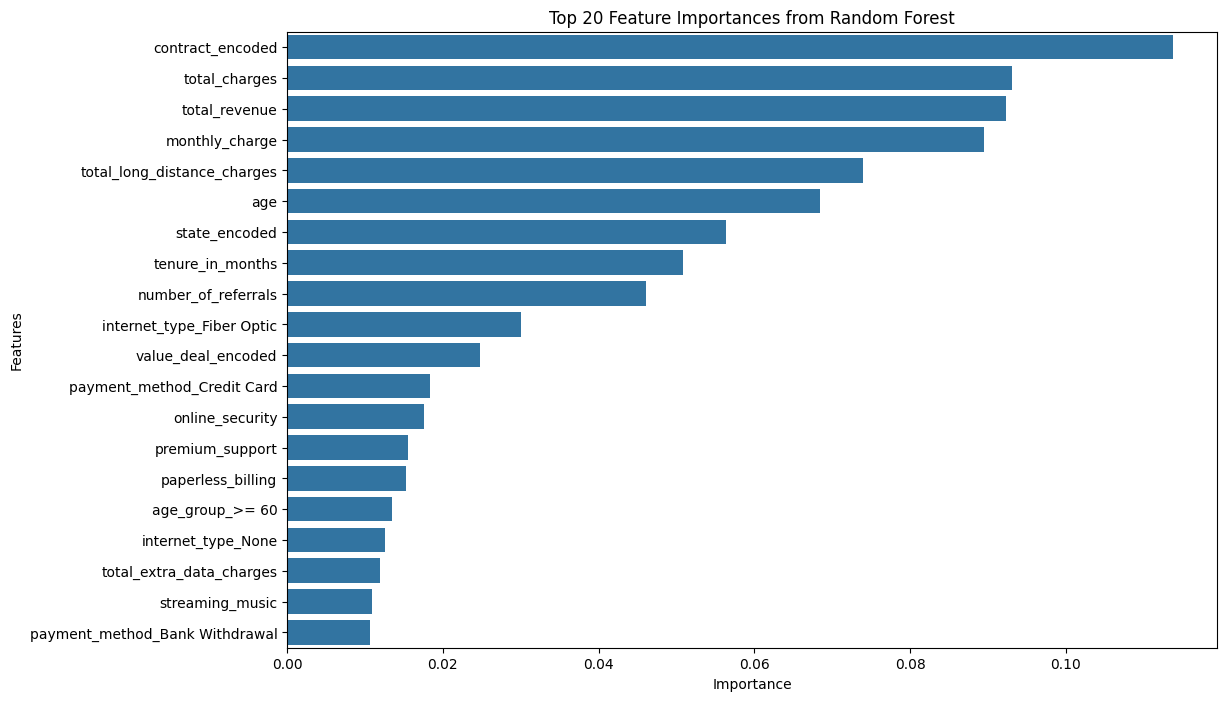

Feature Importances:
contract_encoded                      0.113722
total_charges                         0.093004
total_revenue                         0.092253
monthly_charge                        0.089514
total_long_distance_charges           0.073908
age                                   0.068376
state_encoded                         0.056301
tenure_in_months                      0.050813
number_of_referrals                   0.046090
internet_type_Fiber Optic             0.030036
value_deal_encoded                    0.024807
payment_method_Credit Card            0.018303
online_security                       0.017585
premium_support                       0.015475
paperless_billing                     0.015248
age_group_>= 60                       0.013406
internet_type_None                    0.012522
total_extra_data_charges              0.011922
streaming_music                       0.010882
payment_method_Bank Withdrawal        0.010600
online_backup                         0

In [19]:
# Features Selection : Sau khi mã hõa và xử lý hết các features , ta xem xét độ quan trọng của từng feature dựa vào model Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Tách đặc trưng (X) và biến mục tiêu (y)
# Đảm bảo cột 'churn' là biến mục tiêu và loại bỏ nó khỏi đặc trưng
X = df.drop('churn', axis=1)
y = df['churn']

# Chuyển đổi các cột boolean sang int nếu có (do one-hot encoding với pd.get_dummies)
# Random Forest có thể xử lý boolean, nhưng chuyển sang int là an toàn hơn cho một số thư viện/phiên bản
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra (tùy chọn, nhưng là practice tốt)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Random Forest
# Sử dụng toàn bộ dữ liệu để có cái nhìn tổng quan về độ quan trọng của đặc trưng
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Lấy độ quan trọng của các đặc trưng
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Sắp xếp độ quan trọng và hiển thị
feature_importances = feature_importances.sort_values(ascending=False)

# Hiển thị top 20 đặc trưng quan trọng nhất (hoặc tất cả nếu ít hơn 20)
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.head(20), y=feature_importances.head(20).index)
plt.title('Top 20 Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# In ra bảng độ quan trọng
print("Feature Importances:")
print(feature_importances)

### Kết quả từ đánh giá độ quan trọng dựa trên mô hình Random Forest là rất khả quan , hầu hết các features có độ quan trọng cao đều khớp với những gì đã được phân tích trong phần Insights

In [20]:
# Tiếp theo , ta giữ lại các đặc trưng có độ quan trọng > 0.01
selected_features = feature_importances[feature_importances > 0.01].index.tolist()

# Thêm biến mục tiêu 'churn' vào danh sách các cột được chọn
selected_columns = selected_features + ['churn']

# Tạo DataFrame mới chỉ với các đặc trưng được chọn và biến mục tiêu
df_selected = df[selected_columns].copy()

print(f"Số lượng đặc trưng ban đầu: {X.shape[1]}")
print(f"Số lượng đặc trưng sau khi lọc (độ quan trọng > 0.01): {len(selected_features)}")
print("\nCác đặc trưng được chọn:")
print(selected_features)

# Hiển thị 5 dòng đầu tiên của DataFrame mới
display(df_selected.head())

Số lượng đặc trưng ban đầu: 38
Số lượng đặc trưng sau khi lọc (độ quan trọng > 0.01): 22

Các đặc trưng được chọn:
['contract_encoded', 'total_charges', 'total_revenue', 'monthly_charge', 'total_long_distance_charges', 'age', 'state_encoded', 'tenure_in_months', 'number_of_referrals', 'internet_type_Fiber Optic', 'value_deal_encoded', 'payment_method_Credit Card', 'online_security', 'premium_support', 'paperless_billing', 'age_group_>= 60', 'internet_type_None', 'total_extra_data_charges', 'streaming_music', 'payment_method_Bank Withdrawal', 'online_backup', 'unlimited_data']


,contract_encoded,total_charges,total_revenue,monthly_charge,total_long_distance_charges,age,state_encoded,tenure_in_months,number_of_referrals,internet_type_Fiber Optic,...,premium_support,paperless_billing,age_group_>= 60,internet_type_None,total_extra_data_charges,streaming_music,payment_method_Bank Withdrawal,online_backup,unlimited_data,churn
0,1,-0.128514,-0.364675,-0.118760,-0.883448,-0.004060,0.221884,-1.258699,1.423752,False,...,1,0,False,False,-0.271865,1,False,0,1,0
1,1,-0.609806,0.101552,-1.473909,1.980531,-0.063928,0.261538,0.064313,-1.175659,False,...,0,0,False,True,-0.271865,0,True,0,0,0
2,1,-0.414831,-0.061774,-1.470587,0.942674,-1.021819,0.252019,0.253315,0.990517,False,...,0,0,False,True,-0.271865,0,True,0,0,0
3,2,-0.643073,-0.771864,-0.844495,-0.883448,-0.902083,0.224561,-1.447701,1.423752,False,...,1,1,False,False,-0.271865,0,False,0,1,0
4,2,-0.535231,-0.227132,-1.319462,0.669742,-0.902083,0.228745,-0.880695,0.557281,False,...,0,1,False,True,-0.271865,0,True,0,0,0


# 3. Building Model and Evaluation

Đối với bài dự đoán Churn , Metric quan trọng nhất để đo lường độ hiệu quả của mô hình là Recall của lớp 1 , lý do chính bởi vì :
- Chi phí bỏ lỡ khách hàng (False Negatives): Recall đo lường khả năng mô hình xác định đúng các trường hợp dương thực (khách hàng thực sự sẽ churn). Khi mô hình dự đoán sai một khách hàng sẽ churn là không churn (False Negative), doanh nghiệp sẽ bỏ lỡ cơ hội để can thiệp và giữ chân khách hàng đó. Chi phí để có được một khách hàng mới thường cao hơn nhiều so với chi phí giữ chân một khách hàng hiện tại. Do đó, giảm thiểu False Negatives là cực kỳ quan trọng.
- Mục tiêu kinh doanh: Mục tiêu chính của việc xây dựng mô hình dự đoán churn là để xác định sớm những khách hàng có nguy cơ rời đi, từ đó triển khai các chiến lược giữ chân phù hợp
- Xử lý mất cân bằng lớp: Trong các bộ dữ liệu churn, số lượng khách hàng churn (lớp dương) thường ít hơn đáng kể so với số lượng khách hàng không churn (lớp âm). Nếu mô hình có Precision cao nhưng Recall thấp, điều đó có nghĩa là nó chỉ dự đoán đúng một phần nhỏ trong tổng số khách hàng thực sự sẽ churn, trong khi bỏ sót phần lớn còn lại.

## 3.1 Random Forest

### Trước tiên ta xây dựng model dự đoán cho bộ dữ liệu trước khi lọc features

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = df.drop('churn', axis=1)
y = df['churn']

# Chuyển đổi các cột boolean sang int nếu có (đảm bảo tương thích với mô hình)
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)


# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) # Sử dụng stratify để giữ tỉ lệ churn trong cả train và test

# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced') # Sử dụng class_weight để xử lý mất cân bằng lớp

# Huấn luyện mô hình
rf_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = rf_model.predict(X_test)

# Đánh giá mô hình
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8200253485424588

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      1152
           1       0.71      0.56      0.63       426

    accuracy                           0.82      1578
   macro avg       0.78      0.74      0.75      1578
weighted avg       0.81      0.82      0.81      1578


Confusion Matrix:
 [[1057   95]
 [ 189  237]]


### Kế tiếp , ta xây dựng model dự đoán cho bộ dữ liệu sau khi đã lọc features

In [26]:

# Tách đặc trưng (X_selected) và biến mục tiêu (y_selected) từ df_selected
X_selected = df_selected.drop('churn', axis=1)
y_selected = df_selected['churn']

# Chuyển đổi các cột boolean sang int nếu có (đảm bảo tương thích với mô hình)
for col in X_selected.columns:
    if X_selected[col].dtype == 'bool':
        X_selected[col] = X_selected[col].astype(int)


# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.25, random_state=42, stratify=y_selected) # Sử dụng stratify để giữ tỉ lệ churn trong cả train và test

# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced') # Sử dụng class_weight để xử lý mất cân bằng lớp

# Huấn luyện mô hình
rf_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = rf_model.predict(X_test)

# Đánh giá mô hình
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.826362484157161

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.89      1152
           1       0.73      0.57      0.64       426

    accuracy                           0.83      1578
   macro avg       0.79      0.74      0.76      1578
weighted avg       0.82      0.83      0.82      1578


Confusion Matrix:
 [[1062   90]
 [ 184  242]]


### Nhận xét:
- Sau khi lọc features thì Recall tăng từ 0.56 lên 0.57 , đây là sự cải thiện khá nhỏ nhưng vẫn cho thấy bước lọc features là đúng đắn và nên áp dụng

## 3.2 LightGBM and XGBoost

In [27]:
!pip install lightgbm xgboost

### Áp dụng 2 mô hình với vào bộ dữ liệu đã lọc features

In [28]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Huấn luyện và đánh giá mô hình LightGBM ---
print("--- LightGBM Model ---")
lgbm_model = lgb.LGBMClassifier(random_state=42, class_weight='balanced') # Sử dụng class_weight='balanced'
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

print("Accuracy (LightGBM):", accuracy_score(y_test, y_pred_lgbm))
print("\nClassification Report (LightGBM):\n", classification_report(y_test, y_pred_lgbm))
print("\nConfusion Matrix (LightGBM):\n", confusion_matrix(y_test, y_pred_lgbm))


print("\n" + "="*30 + "\n") # Dòng phân cách


# --- Huấn luyện và đánh giá mô hình XGBoost ---
print("--- XGBoost Model ---")
# scale_pos_weight có thể hữu ích với dữ liệu mất cân bằng.
# Tỷ lệ: số lượng mẫu âm / số lượng mẫu dương
scale_pos_weight_value = sum(y_train == 0) / sum(y_train == 1)
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight_value)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("Accuracy (XGBoost):", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix (XGBoost):\n", confusion_matrix(y_test, y_pred_xgb))

--- LightGBM Model ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1279, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1214
[LightGBM] [Info] Number of data points in the train set: 4733, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Accuracy (LightGBM): 0.8193916349809885

Classification Report (LightGBM):
               precision    recall  f1-score   support

           0       0.91      0.84      0.87      1152
           1       0.64      0.78      0.70       426

    accuracy                           0.82      1578
   macro avg       0.77      0.81      0.79     

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:55:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Nhận xét:
- Đối với 2 mô hình mới , Recall lớp 1 hiện tại đã tăng lên đáng kể . Cụ thể , XGBoost cho ra 0.67 và LightGBM cho kết quả 0.78 . Nguyên nhân là 2 mô hình này (đặc biệt là LightGBM) rất phù hợp cho dạng bài toán phân loại với bộ dữ liệu nhiều đặc trưng
